# Import Dependencies and Data Files

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [5]:
path = untar_data(URLs.PETS); 
path

/home/vishy/anaconda3/envs/fastai/lib/python3.7/site-packages/fastai/datasets.py:164: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


PosixPath('/home/vishy/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/home/vishy/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/vishy/.fastai/data/oxford-iiit-pet/annotations')]

In [7]:
path_anno = path/'annotations'
path_img = path/'images'

In [8]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/vishy/.fastai/data/oxford-iiit-pet/images/samoyed_105.jpg'),
 PosixPath('/home/vishy/.fastai/data/oxford-iiit-pet/images/pomeranian_165.jpg'),
 PosixPath('/home/vishy/.fastai/data/oxford-iiit-pet/images/basset_hound_121.jpg'),
 PosixPath('/home/vishy/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_166.jpg'),
 PosixPath('/home/vishy/.fastai/data/oxford-iiit-pet/images/Sphynx_72.jpg')]

In [9]:
help(get_image_files)

Help on function get_image_files in module fastai.vision.data:

get_image_files(c: Union[pathlib.Path, str], check_ext: bool = True, recurse=False) -> Collection[pathlib.Path]
    Return list of files in `c` that are images. `check_ext` will filter to `image_extensions`.



In [10]:
np.random.seed(42)
pat = r'/([^/]+)_\d+.jpg$'

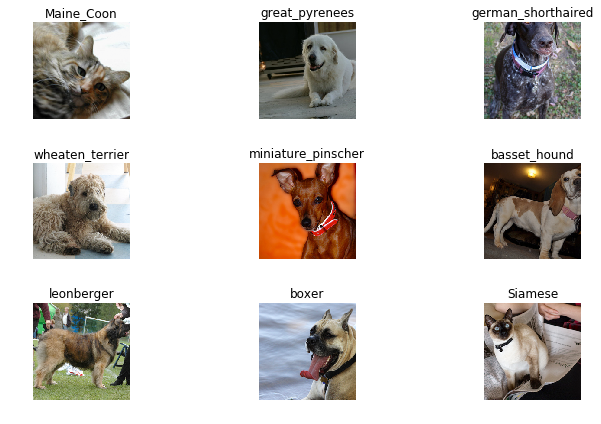

In [11]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(10,6))

In [12]:
help(ImageDataBunch.from_name_re)

Help on method from_name_re in module fastai.vision.data:

from_name_re(path: Union[pathlib.Path, str], fnames: Collection[pathlib.Path], pat: str, valid_pct: float = 0.2, **kwargs) method of builtins.type instance
    Create from list of `fnames` in `path` with re expression `pat`.



In [13]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

# Training: resnet34

In [14]:
help(cnn_learner)

Help on function cnn_learner in module fastai.vision.learner:

cnn_learner(data: fastai.basic_data.DataBunch, base_arch: Callable, cut: Union[int, Callable] = None, pretrained: bool = True, lin_ftrs: Union[Collection[int], NoneType] = None, ps: Union[float, Collection[float]] = 0.5, custom_head: Union[torch.nn.modules.module.Module, NoneType] = None, split_on: Union[Callable, Collection[Collection[torch.nn.modules.module.Module]], NoneType] = None, bn_final: bool = False, init=<function kaiming_normal_ at 0x7fc0c7a01378>, concat_pool: bool = True, **kwargs: Any) -> fastai.basic_train.Learner
    Build convnet style learner.



In [15]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [16]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [17]:
help(fit_one_cycle)

Help on function fit_one_cycle in module fastai.train:

fit_one_cycle(learn: fastai.basic_train.Learner, cyc_len: int, max_lr: Union[float, Collection[float], slice] = slice(None, 0.003, None), moms: Tuple[float, float] = (0.95, 0.85), div_factor: float = 25.0, pct_start: float = 0.3, final_div: float = None, wd: float = None, callbacks: Union[Collection[fastai.callback.Callback], NoneType] = None, tot_epochs: int = None, start_epoch: int = None) -> None
    Fit a model following the 1cycle policy.



In [18]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.548113,0.389183,0.106225,00:17
1,0.602225,0.267524,0.087280,00:16
2,0.371765,0.255286,0.085250,00:16
3,0.267034,0.205278,0.069689,00:16
4,0.212777,0.204655,0.067659,00:16


In [19]:
learn.save('stage-1')

In [20]:
help(ClassificationInterpretation.from_learner)

Help on method _cl_int_from_learner in module fastai.vision.learner:

_cl_int_from_learner(learn: fastai.basic_train.Learner, ds_type: fastai.basic_data.DatasetType = <DatasetType.Valid: 2>, tta=False) method of builtins.type instance
    Create an instance of `ClassificationInterpretation`. `tta` indicates if we want to use Test Time Augmentation.



In [21]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) ==len(idxs)

True

In [22]:
help(interp.plot_top_losses)

Help on method _cl_int_plot_top_losses in module fastai.vision.learner:

_cl_int_plot_top_losses(k, largest=True, figsize=(12, 12), heatmap: bool = True, heatmap_thresh: int = 16, return_fig: bool = None) -> Union[matplotlib.figure.Figure, NoneType] method of fastai.train.ClassificationInterpretation instance
    Show images in `top_losses` along with their prediction, actual, loss, and probability of predicted class.



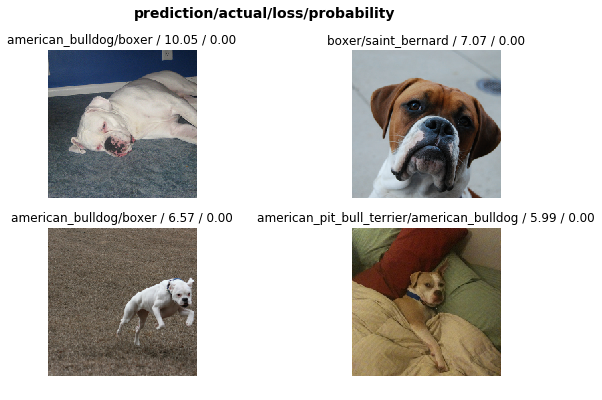

In [23]:
interp.plot_top_losses(4, figsize=(10,6), heatmap=False)

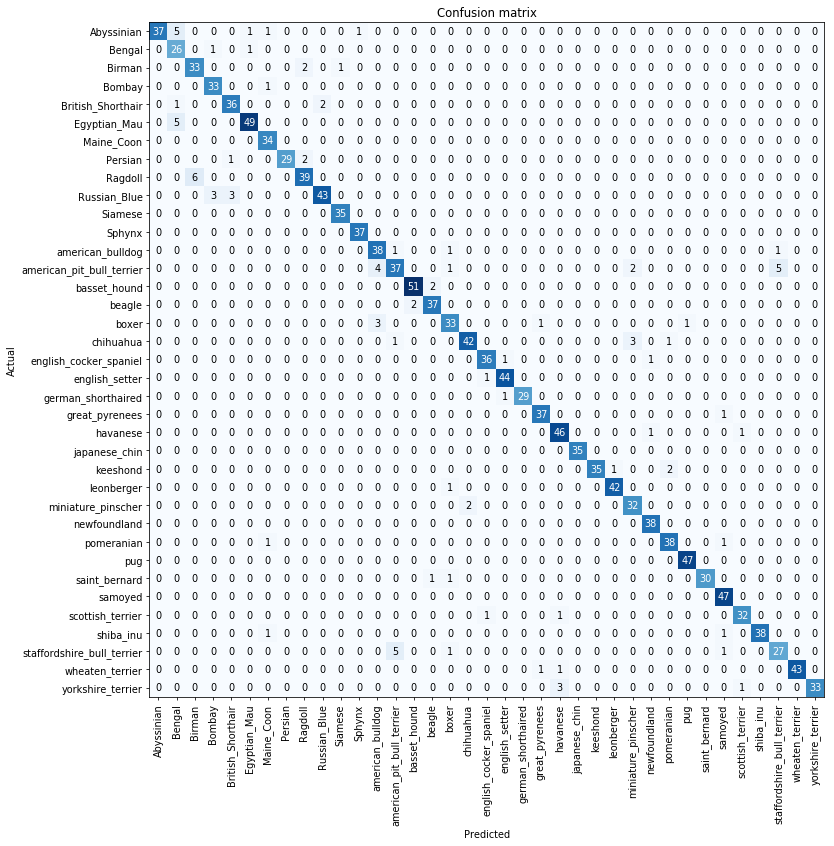

In [24]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=70)

In [25]:
interp.most_confused(min_val=2)[:5]

[('Ragdoll', 'Birman', 6),
 ('Abyssinian', 'Bengal', 5),
 ('Egyptian_Mau', 'Bengal', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]

# Unfreezing, fine-tuning, and learning rates

In [26]:
learn.unfreeze()

In [27]:
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,time
0,0.573362,0.358511,0.120433,00:20


In [28]:
learn.load('stage-1');

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


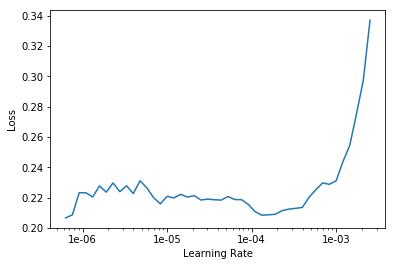

In [30]:
learn.recorder.plot()

In [31]:
learn.unfreeze()
learn.fit_one_cycle(6, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.207377,0.205097,0.066306,00:20
1,0.201376,0.201402,0.064276,00:20
2,0.177271,0.189450,0.060893,00:20
3,0.160824,0.189487,0.065629,00:20
4,0.148699,0.184620,0.060217,00:20
5,0.138444,0.186038,0.062923,00:20


# Training: resnet50

In [16]:
bs//2

32

In [14]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [15]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


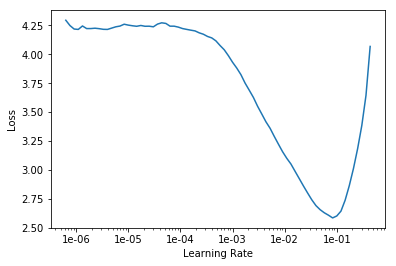

In [17]:
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.757427,0.276887,0.077131,00:52
1,0.415486,0.256206,0.075101,00:50
2,0.359797,0.216820,0.066306,00:51
3,0.274229,0.213022,0.067659,00:51
4,0.199894,0.166399,0.053451,00:51
5,0.146241,0.154058,0.046008,00:51
6,0.117471,0.143312,0.043978,00:51
7,0.100088,0.145517,0.043302,00:51


In [19]:
learn.save('stage-1-50')

In [20]:
learn.unfreeze()
learn.fit_one_cycle(6, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.088559,0.145247,0.044655,01:10
1,0.093019,0.142704,0.041949,01:09
2,0.093973,0.143859,0.041272,01:09
3,0.070506,0.140150,0.039242,01:09
4,0.056448,0.138511,0.042625,01:09
5,0.050512,0.140451,0.040595,01:09


In [21]:
learn.load('stage-1-50');

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

In [23]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('beagle', 'basset_hound', 3),
 ('boxer', 'american_bulldog', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Birman', 'Ragdoll', 2),
 ('Ragdoll', 'Persian', 2),
 ('american_bulldog', 'boxer', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('keeshond', 'pomeranian', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2),
 ('yorkshire_terrier', 'scottish_terrier', 2)]

# Other data formats

In [58]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/home/vishy/.fastai/data/mnist_sample')

In [59]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

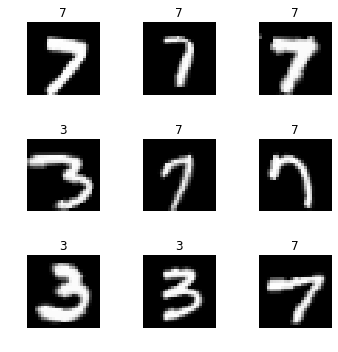

In [60]:
data.show_batch(rows=3, figsize=(5,5))

In [61]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn.fit(2)

epoch,train_loss,valid_loss,accuracy
1,0.160639,0.085169,0.968106
2,0.098457,0.043442,0.985770


In [62]:
df = pd.read_csv(path/'labels.csv')
df.head()

AttributeError: 'LazyConfigValue' object has no attribute 'lower'

                name  label
0   train/3/7463.png      0
1  train/3/21102.png      0
2  train/3/31559.png      0
3  train/3/46882.png      0
4  train/3/26209.png      0

In [63]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

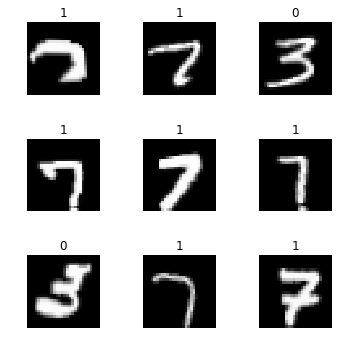

In [64]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [65]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [66]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/home/vishy/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/home/vishy/.fastai/data/mnist_sample/train/3/21102.png')]

In [67]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [68]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [69]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [70]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']